# Challenge Wahrscheinlichkeitsmodellierung

Autoren: Aaron Studer, Luca Gisler, Christian Heeb





# Inhaltsverzeichnis:
1. [Einführung](#introduction)
2. [Aufgabenstellung](#task)
3. [Grundlagen](#basics)
4. [Setup](#setup)
5. [Datenbereinigung & Transformation](#datenbereinigung)
    1. [Bereinigung Ablösezone 1](#datenbereinigung-1)
    2. [Bereinigung Ablösezone 2](#datenbereinigung-2)
    3. [Erweiterung Zeitdifferenz zwischen Datensatz](#datenerweiterung-1)
    4. [Erweiterung Kinetische Energie](#datenerweiterung-2)
    5. [Zusammenführung der Dateframes der Zone 1 & 2](#datentransformation-1)
6. [Analyse der Daten](#dataanalysis)
    1. [Boxplots](#dataanalysis-1)
    2. [Histogramme](#dataanalysis-2)
    3. [Streudiagramme](#dataanalysis-3)
    4. [Zeitliche Verteilung der Steinschläge](#dataanalysis-4)
        1. [Stündliche Verkehrsdichte](#dataanalysis-4-1)
    5. [Beurteilung Ablösezone 1 ](#dataexamination-1)
        1. [Geschwindigkeit](#dataexamination-1-1)
        2. [Masse](#dataexamination-1-2)
        3. [Zeitdifferenz](#dataexamination-1-3)
    6. [Beurteilung Ablösezone 1 ](#dataexamination-2)
        1. [Geschwindigkeit](#dataexamination-2-1)
        2. [Masse](#dataexamination-2-2)
        3. [Zeitdifferenz](#dataexamination-2-3)
    7. [Übersicht der ausgewählten Verteilungen in Zone 1 und 2](#dataexamination-1-and-2)
7. [Simulation der Daten](#datasimulation)
    1. [Simulation der Zone 1](#datasimulation-1)
    2. [Simulation der Zone 2](#datasimulation-2)
8. [Bedingung für das Zerreissen des Sicherheitsnetzes](#requirements)
    1. [Auto wird von Stein getroffen](#use-case-1)
9. [Fazit](#simulation-result)
10. [Quellen](#sources)

# Einführung <a name="introduction"></a>

Dieses Notebook enthält unsere Abgabe für die Challenge CWM1.

# Aufgabenstellung <a name="task"></a>

Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand der vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.0001 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.


## Grundlagen <a name="basics"></a>

Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignissen aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt das Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000 kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetzen werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 1200 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h

***

# Setup <a name="setup"></a>

In [57]:
#prepration of workspace
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from fitter import Fitter, get_common_distributions
from scipy import stats
import matplotlib.pyplot as plt


In [58]:
#import df
df_zone1 = pd.read_csv("https://raw.githubusercontent.com/ChristianHeeb/cwm1_challenge/main/00_data/out_1.csv?token=GHSAT0AAAAAACBZ5JTQQM6MYZQX6TPZW3D2ZEMONXA")
df_zone2 = pd.read_csv("https://raw.githubusercontent.com/ChristianHeeb/cwm1_challenge/main/00_data/out_2.csv?token=GHSAT0AAAAAACBZ5JTQR2DYP34VKTCCD76WZEMOOCQ")

# Datenbereinigung <a name="datenbereinigung"></a>
## Daten zu Ablösezone 1 bereinigen <a name="datenbereinigung-1"></a>

In [59]:
#explore dataset
df_zone1.head(5)

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#rename columns
df_zone1 = df_zone1.rename(columns={"Datum": "date", "Uhrzeit": "time", "Masse [kg]": "mass [kg]", "Geschwindigkeit [m/s]": "vel [m/s]"})

In [61]:
#remove NaN values
df_zone1 = pd.DataFrame(df_zone1)
df_zone1.drop(df_zone1.iloc[:, 4:77],axis = 1, inplace = True )
df_zone1 = df_zone1.iloc[0:68]
display(df_zone1)

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18,16:00,167.0,8.9
64,2019-03-22,18:00,2847.0,7.0
65,2019-03-26,00:00,44.0,8.9
66,2019-03-26,06:00,45.0,8.4


In [62]:
#check datatypes
df_zone1.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [63]:
#change datatype of column "date" from object to DateTime

#connect column date and time but also keep time row for later use
df_zone1["time [h]"] = df_zone1["time"]

df_zone1["date"] = pd.to_datetime(df_zone1["date"] + " " + df_zone1["time"])

#rearrange columns
df_zone1 = df_zone1[["date", "time [h]", "mass [kg]", "vel [m/s]"]]

In [64]:
#check datatypes
df_zone1.dtypes

date         datetime64[ns]
time [h]             object
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [65]:
#sort df by date
df_zone1.sort_values(by = "date", inplace = True)

In [66]:
display(df_zone1)

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,194.0,8.4
1,2019-01-01 21:00:00,21:00,224.0,8.8
2,2019-01-02 14:00:00,14:00,3104.0,9.2
3,2019-01-04 15:00:00,15:00,228.0,8.0
4,2019-01-05 23:00:00,23:00,755.0,7.0
...,...,...,...,...
63,2019-03-18 16:00:00,16:00,167.0,8.9
64,2019-03-22 18:00:00,18:00,2847.0,7.0
65,2019-03-26 00:00:00,00:00,44.0,8.9
66,2019-03-26 06:00:00,06:00,45.0,8.4


## Daten zu Ablösezone 2 bereinigen <a name="datenbereinigung-2"></a>

In [67]:
#explore dataset
df_zone2.head(5)

,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#rename columns
df_zone2 = df_zone2.rename(columns={"Date": "date", "Uhrzeit": "time", "m [kg]": "mass [kg]", "v [m/s]": "vel [m/s]"})

In [69]:
#remove NaN values
df_zone2 = pd.DataFrame(df_zone2)
df_zone2.drop(df_zone2.iloc[:, 4:77],axis = 1, inplace = True )
df_zone2 = df_zone2.iloc[0:32]
display(df_zone2.head(5))

,date,time,mass [kg],vel [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6


In [70]:
#check datatypes
df_zone2.dtypes

date          object
time          object
mass [kg]    float64
vel [m/s]    float64
dtype: object

In [71]:
#change datatype of column "date" from object to DateTime

#connect column date and time but also keep time row for later use
df_zone2["time [h]"] = df_zone2["time"]
df_zone2["date"] = pd.to_datetime(df_zone2["date"] + " " + df_zone2["time"])

#rearrange columns
df_zone2 = df_zone2[["date", "time [h]", "mass [kg]", "vel [m/s]"]]


In [72]:
#check datatypes
df_zone2.dtypes

date         datetime64[ns]
time [h]             object
mass [kg]           float64
vel [m/s]           float64
dtype: object

In [73]:
#sort df by date
df_zone2.sort_values(by = "date", inplace = True)

In [74]:
display(df_zone2.head(5))

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


## Bereinigen der Messfehler <a name="datenbereinigung-3"></a>
In der bezeichneten Zone Zwei wurde bei der Datenerfassung vom 10. März 2019 eine Masse von 0.0 Kg dokumentiert. Da diese Eintragung unmöglich ist, impliziert sie einen Fehler innerhalb des Datensatzes.
Zur Korrektur dieses Fehlers stehen verschiedene Optionen zur Verfügung, einschliesslich der Löschung des fehlerhaften Eintrags oder der Ersetzung durch einen geeigneten Ersatzwert, wie beispielsweise den Median aller vorhandenen Messwerte.
In Anbetracht der Grösse unseres Datensatzes, der als relativ klein klassifiziert wird, erscheint eine Imputation als geeignete Lösung. Durch diesen Prozess werden fehlende oder fehlerhafte Daten durch plausible Werte ersetzt, wodurch die Stichprobengrösse beibehalten und Verzerrungen minimiert werden können.

In [75]:
#determine median df_zone 2
median_zone2 = df_zone2["mass [kg]"].median()

#input value to df
df_zone2.loc[df_zone2["mass [kg]"] <= 0, "mass [kg]"] = median_zone2

#show data
display(df_zone2.head(5))

,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


In [76]:
#sort data by Date
df_zone1.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone1.head(5))

df_zone2.sort_values(by = "date", ascending = True, inplace = True)
display(df_zone2.head(5))


,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,194.0,8.4
1,2019-01-01 21:00:00,21:00,224.0,8.8
2,2019-01-02 14:00:00,14:00,3104.0,9.2
3,2019-01-04 15:00:00,15:00,228.0,8.0
4,2019-01-05 23:00:00,23:00,755.0,7.0


,date,time [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,38.0,45.4
1,2019-01-03 06:00:00,06:00,187.0,41.6
2,2019-01-04 10:00:00,10:00,36.0,44.6
3,2019-01-07 14:00:00,14:00,6.0,41.2
4,2019-01-11 06:00:00,06:00,65.0,39.6


## Zeitdifferenz zwischen Ablösungen berechnen <a name="datenerweiterung-1"></a>

Eine wichtige Information welche zur Analyse und Simulation der Daten benötigt wird, ist die Zeitdifferenz zwischen den einzelnen Steinschlägen.

In [77]:
#create column to assign running time difference in hours
#Zone 1
df_zone1["timediff [h]"] = 0
df_zone1["timediff [h]"] = (df_zone1["date"] - df_zone1["date"].shift(1)).dt.total_seconds() / 3600

# replace first NaN with 0
df_zone1["timediff [h]"].fillna(0,inplace=True)
df_zone1["timediff [h]"] = df_zone1["timediff [h]"].astype("int")

#rearrange columns
df_zone1 = df_zone1[["date", "time [h]", "timediff [h]", "mass [kg]", "vel [m/s]"]]

display(df_zone1.head(5))

#Zone 2
df_zone2["timediff [h]"] = 0
df_zone2["timediff [h]"] = (df_zone2["date"] -
                                       df_zone2["date"].shift(1)).dt.total_seconds() / 3600

# replace first NaN with 0
df_zone2["timediff [h]"].fillna(0,inplace=True)
df_zone2["timediff [h]"] = df_zone2["timediff [h]"].astype("int")

#rearrange columns
df_zone2 = df_zone2[["date", "time [h]", "timediff [h]", "mass [kg]", "vel [m/s]"]]

display(df_zone2.head(5))

,date,time [h],timediff [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,0,194.0,8.4
1,2019-01-01 21:00:00,21:00,12,224.0,8.8
2,2019-01-02 14:00:00,14:00,17,3104.0,9.2
3,2019-01-04 15:00:00,15:00,49,228.0,8.0
4,2019-01-05 23:00:00,23:00,32,755.0,7.0


,date,time [h],timediff [h],mass [kg],vel [m/s]
0,2019-01-01 09:00:00,09:00,0,38.0,45.4
1,2019-01-03 06:00:00,06:00,45,187.0,41.6
2,2019-01-04 10:00:00,10:00,28,36.0,44.6
3,2019-01-07 14:00:00,14:00,76,6.0,41.2
4,2019-01-11 06:00:00,06:00,88,65.0,39.6


## Kinetische Energie Berechnen <a name="datenerweiterung-2"></a>



In [78]:
#zone 1
df_zone1["KE [kJ]"] = 0.5 * df_zone1["mass [kg]"] * df_zone1["vel [m/s]"]**2 / 1000

#zone2
df_zone2["KE [kJ]"] = 0.5 * df_zone2["mass [kg]"] * df_zone2["vel [m/s]"]**2 / 1000


## Verbinden der beiden Datensätze <a name="datentransformation-1"></a>

Für spätere Analysen werden die Datensätze df_zone1 und df_zone2 zu zusammengeführt.

In [79]:
#connect dfs
df_zoneall = pd.concat([df_zone1, df_zone2])

#sort data by Date
df_zoneall.sort_values(by = "date", ascending = True, inplace = True)

df_zoneall.head(5)


,date,time [h],timediff [h],mass [kg],vel [m/s],KE [kJ]
0,2019-01-01 09:00:00,09:00,0,194.0,8.4,6.84432
0,2019-01-01 09:00:00,09:00,0,38.0,45.4,39.16204
1,2019-01-01 21:00:00,21:00,12,224.0,8.8,8.67328
2,2019-01-02 14:00:00,14:00,17,3104.0,9.2,131.36128
1,2019-01-03 06:00:00,06:00,45,187.0,41.6,161.80736


# Analyse der Daten <a name="dataanalysis"></a>

In diesem Abschnitt erfolgt eine Visualisierung und Analyse der Daten mittels Histogrammen und Streudiagrammen. Dadurch lassen sich potenzielle Ähnlichkeiten in den Datensätzen ermitteln.

In [80]:
#overview of dataframe df_zone1 and df_zone2
df_zone1.describe()

,timediff [h],mass [kg],vel [m/s],KE [kJ]
count,68.000000,68.000000,68.000000,68.000000
mean,30.102941,628.632353,8.788235,25.197761
std,27.789260,695.884703,1.989189,32.704933
min,0.000000,12.000000,3.600000,0.464640
25%,5.750000,214.750000,7.300000,8.214900
50%,22.000000,402.500000,8.800000,12.815133
75%,49.000000,773.000000,10.125000,23.135955
max,113.000000,3104.000000,14.100000,164.403200


In [81]:
df_zone2.describe()

,timediff [h],mass [kg],vel [m/s],KE [kJ]
count,32.000000,32.000000,32.000000,32.000000
mean,64.250000,101.062500,37.790625,72.543707
std,55.533193,102.785382,5.395778,87.452601
min,0.000000,3.000000,24.900000,2.683935
25%,27.750000,37.750000,33.200000,29.600176
50%,48.500000,58.000000,38.750000,39.581020
75%,77.250000,140.000000,41.725000,63.103560
max,212.000000,406.000000,46.500000,394.796430


## Boxplots <a name="dataanalysis-1"></a>

Im ersten Schritt der Datenanalyse erfolgt die Untersuchung der einzelnen Datensätze mittels Boxplots. Diese Methode ermöglicht eine detaillierte Visualisierung der Datenverteilung und fördert somit das Verständnis für ihre strukturellen Eigenschaften. Des Weiteren hilft sie dabei, potenzielle Ausreisser zu identifizieren, die eine bedeutende Auswirkung auf nachfolgende statistische Analysen und Modellierungen haben könnten.

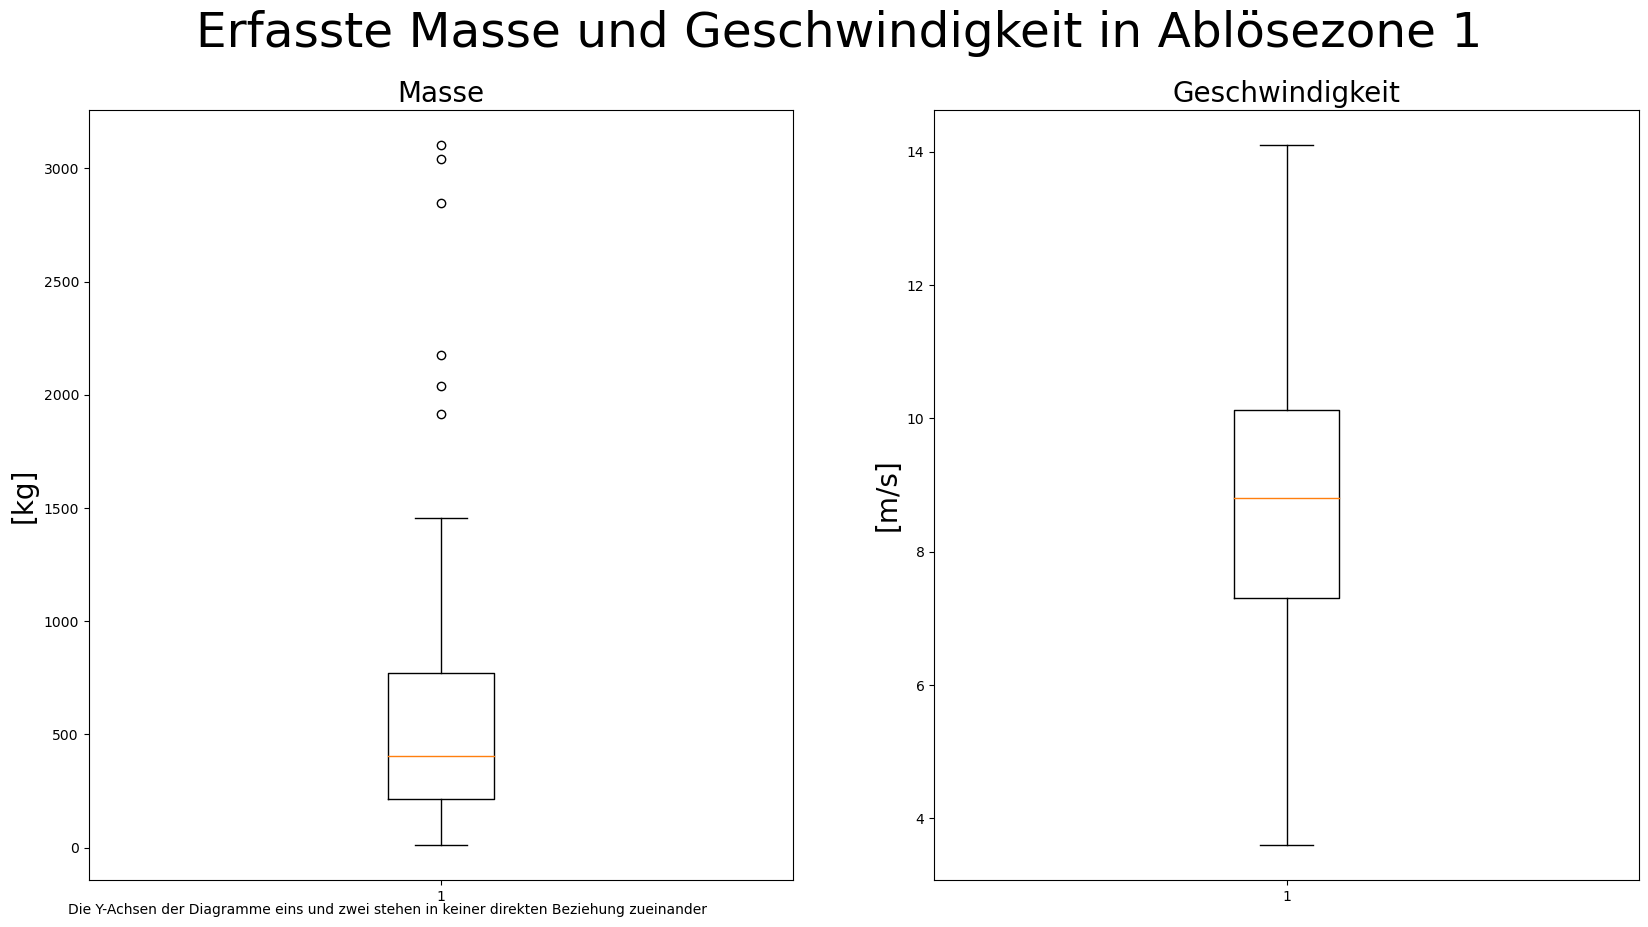

In [82]:
#boxplot of attributes "mass" and "velocity"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone1["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)

#subplot 1
ax2.boxplot(df_zone1["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)

#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

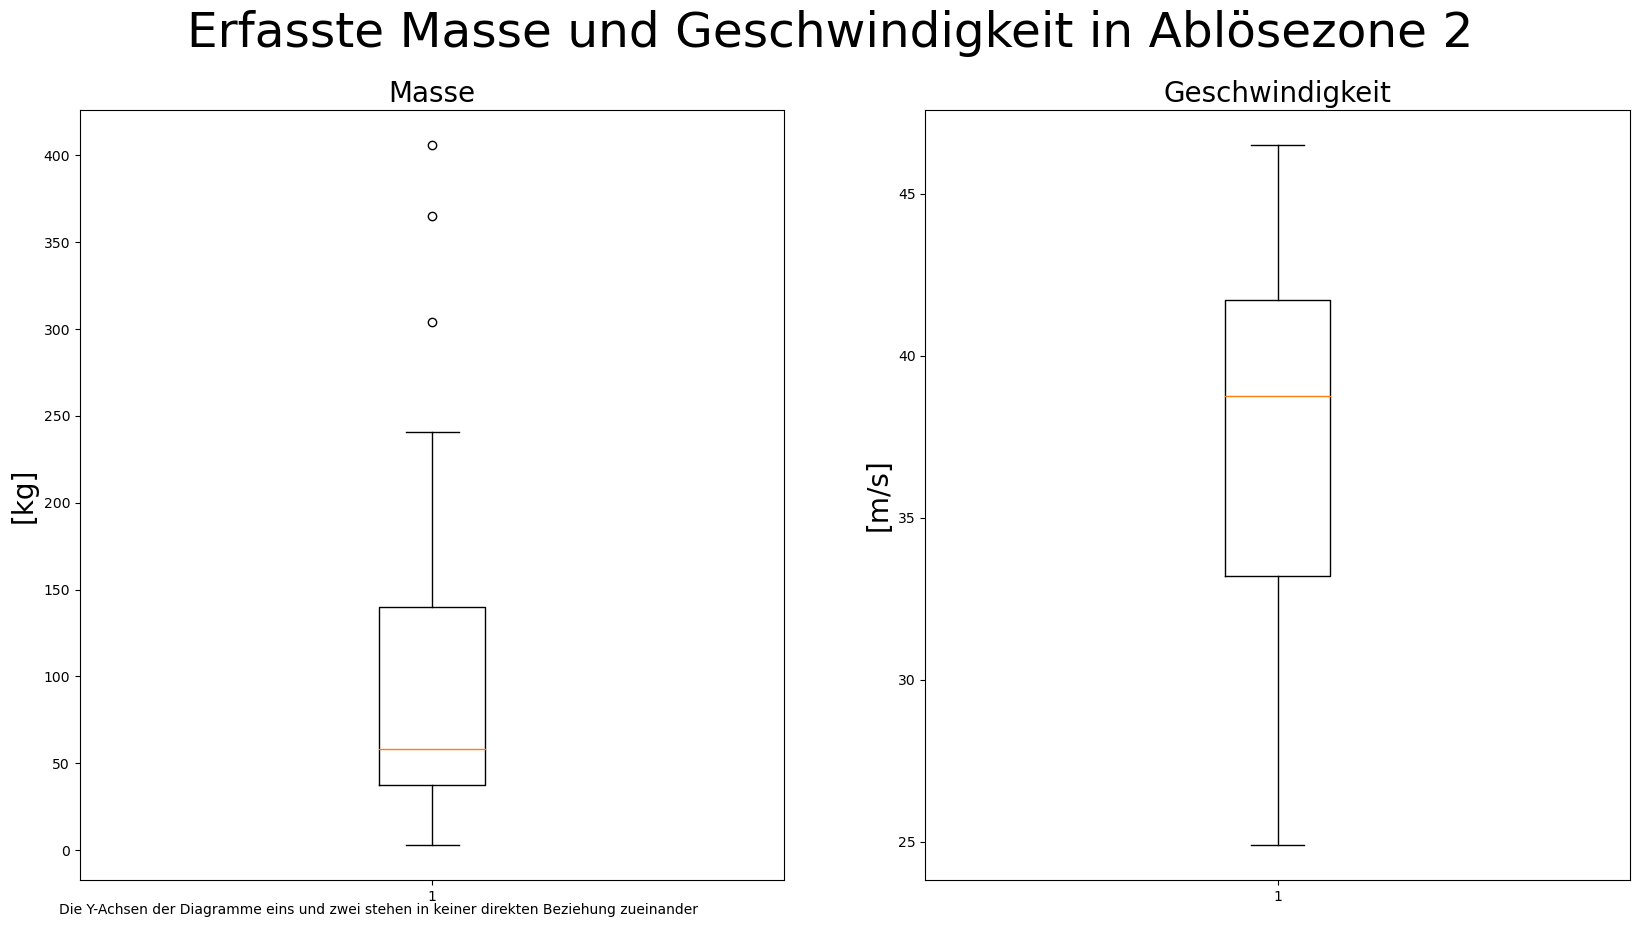

In [83]:
#boxplot of attributes "mass" and "velocity"
fig1, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.boxplot(df_zone2["mass [kg]"])
ax1.set_xlabel("", fontsize = 20)
ax1.set_ylabel("[kg]", fontsize = 20)
ax1.set_title("Masse", fontsize = 20)


#subplot 1
ax2.boxplot(df_zone2["vel [m/s]"])
ax2.set_ylabel("[m/s]", fontsize = 20)
ax2.set_title("Geschwindigkeit", fontsize = 20)


#overall title
plt.suptitle("Erfasste Masse und Geschwindigkeit in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.03
ax1.text(x, y, "Die Y-Achsen der Diagramme eins und zwei stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()


## Histogramme <a name="dataanalysis-2"></a>

Um die Verteilung und Ausprägung der Daten weiter zu analysieren, werden Histogramme verwendet.

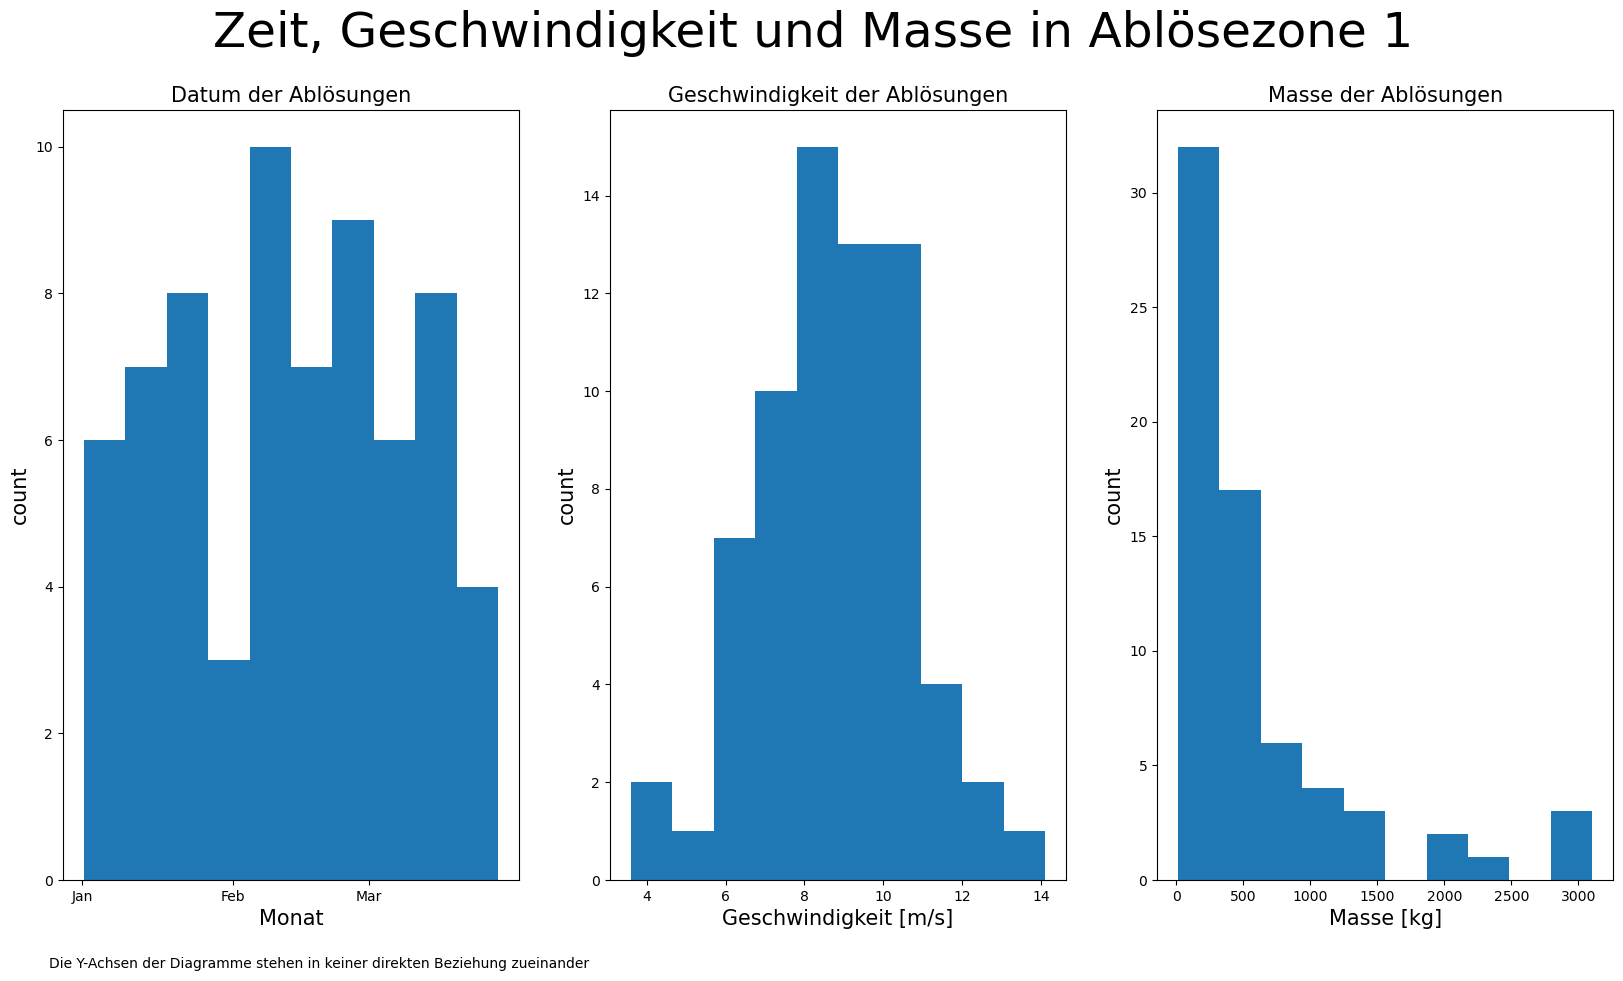

In [84]:
#Barplot of attributes "time", "mass" and "velocity"
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone1["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone1["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone1["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 1", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

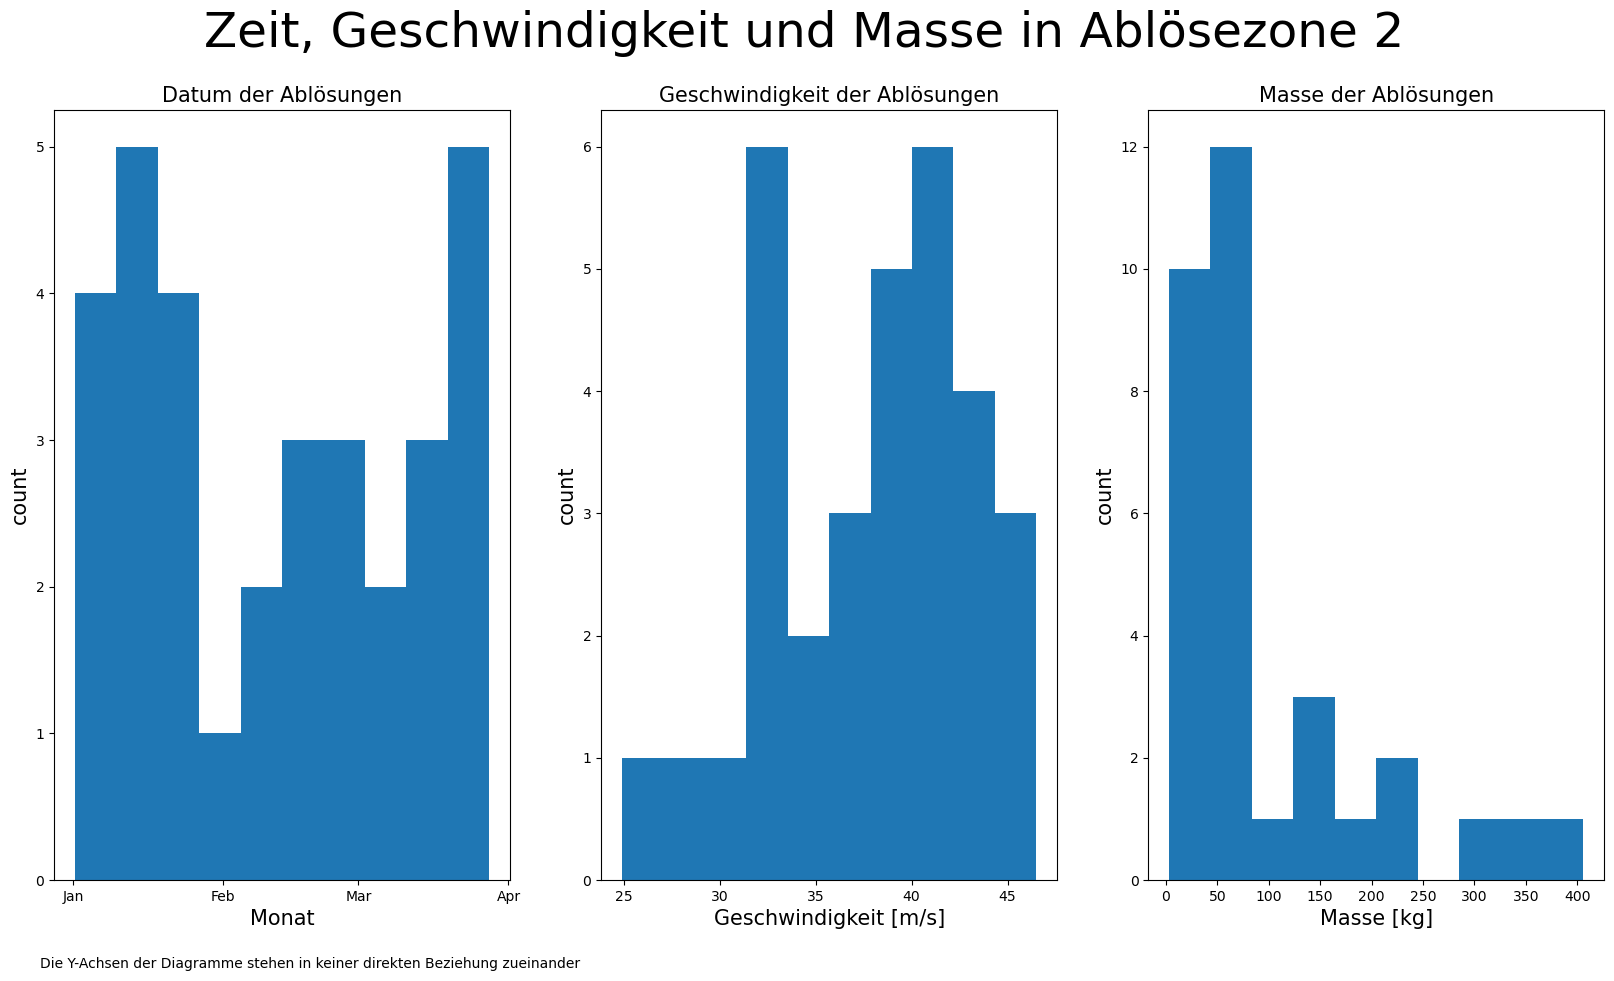

In [85]:
#Barplot of attributes "time", "mass" and "velocity"
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

#subplot 1
ax1.hist(df_zone2["date"])
ax1.set_xlabel("", fontsize = 15)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Monat", fontsize = 15)
ax1.set_title("Datum der Ablösungen", fontsize = 15)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b"))


#subplot 2
ax2.hist(df_zone2["vel [m/s]"])
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Geschwindigkeit [m/s]", fontsize = 15)
ax2.set_title("Geschwindigkeit der Ablösungen", fontsize = 15)

#subplot 3
ax3.hist(df_zone2["mass [kg]"])
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Masse [kg]", fontsize = 15)
ax3.set_title("Masse der Ablösungen", fontsize = 15)

#overall title
plt.suptitle("Zeit, Geschwindigkeit und Masse in Ablösezone 2", fontsize = 35)

#footnote
x = -0.03
y = -0.1
ax1.text(x, y, "Die Y-Achsen der Diagramme stehen in keiner direkten Beziehung zueinander", fontsize=10,
        horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
plt.show()

## Streudiagramme <a name="dataanalysis-3"></a>

Zur direkten Gegenüberstellung und Analyse der betreffenden Datensätze wurden Streudiagramme erstellt.

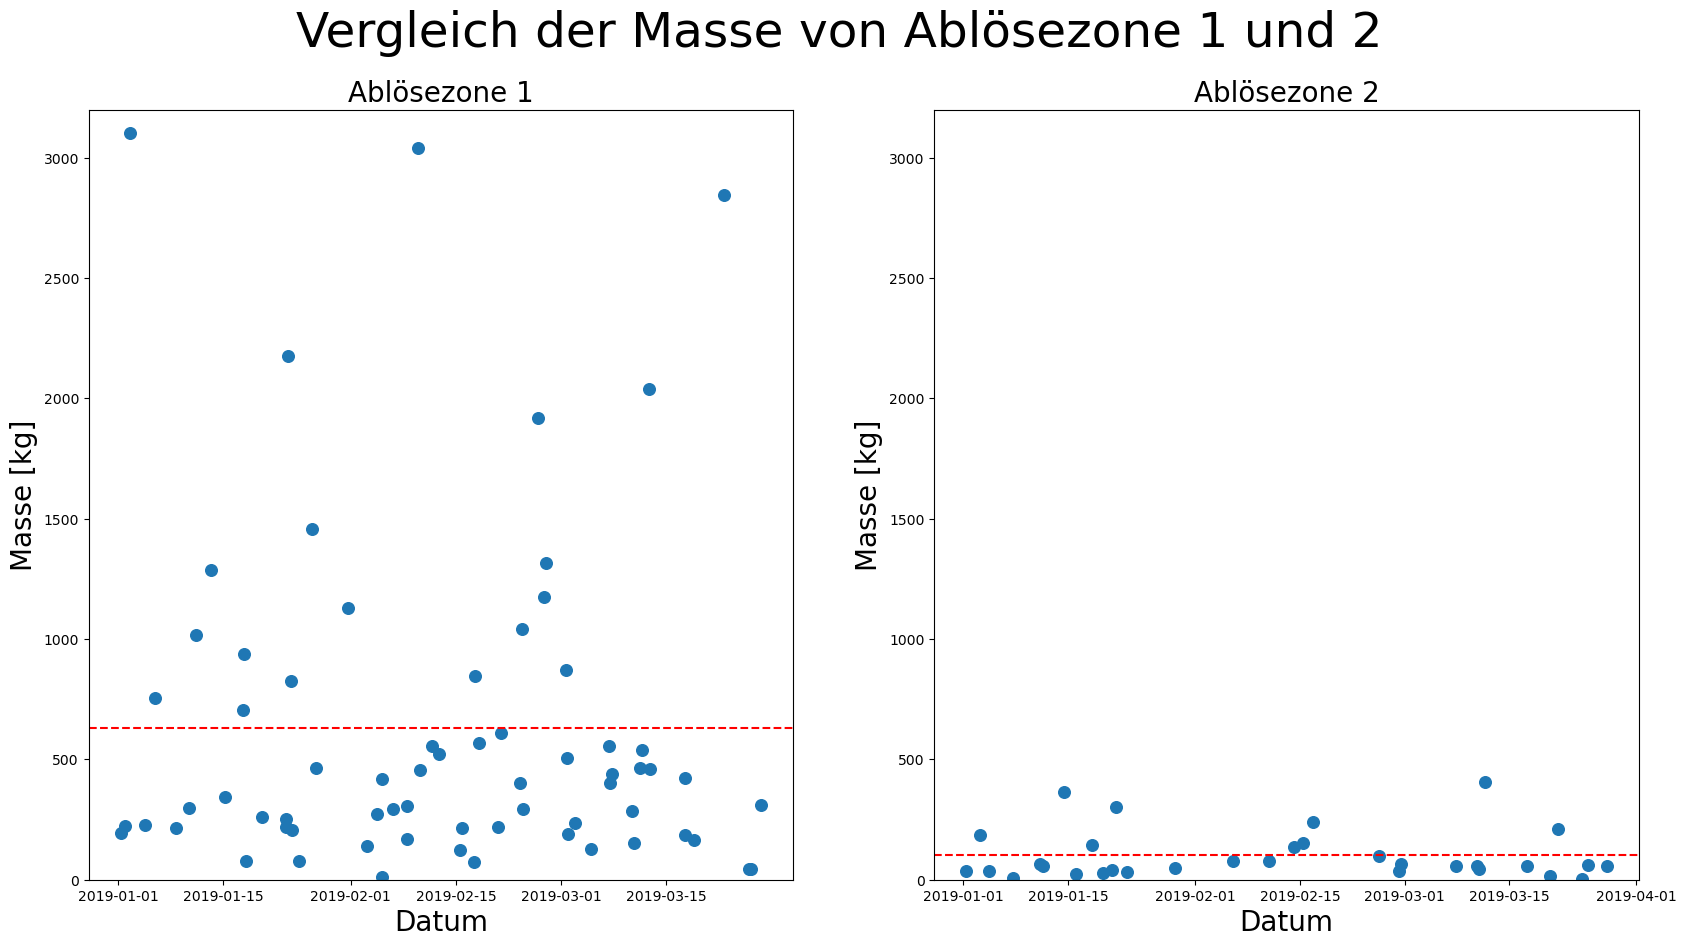

In [86]:
#compare mass of the fallen rocks
fig5, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["mass [kg]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Masse [kg]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=3200)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["mass [kg]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Masse [kg]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=3200)

#overall title
plt.suptitle("Vergleich der Masse von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["mass [kg]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["mass [kg]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')


#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Eine Gegenüberstellung der beiden Ablösezonen zeigt, dass Steinschläge in Zone 1 häufiger vorkommen als in Zone 2. Weiter wird ersichtlich, dass sich im Zone 1 Steine mit grösserer Masse ablösen.

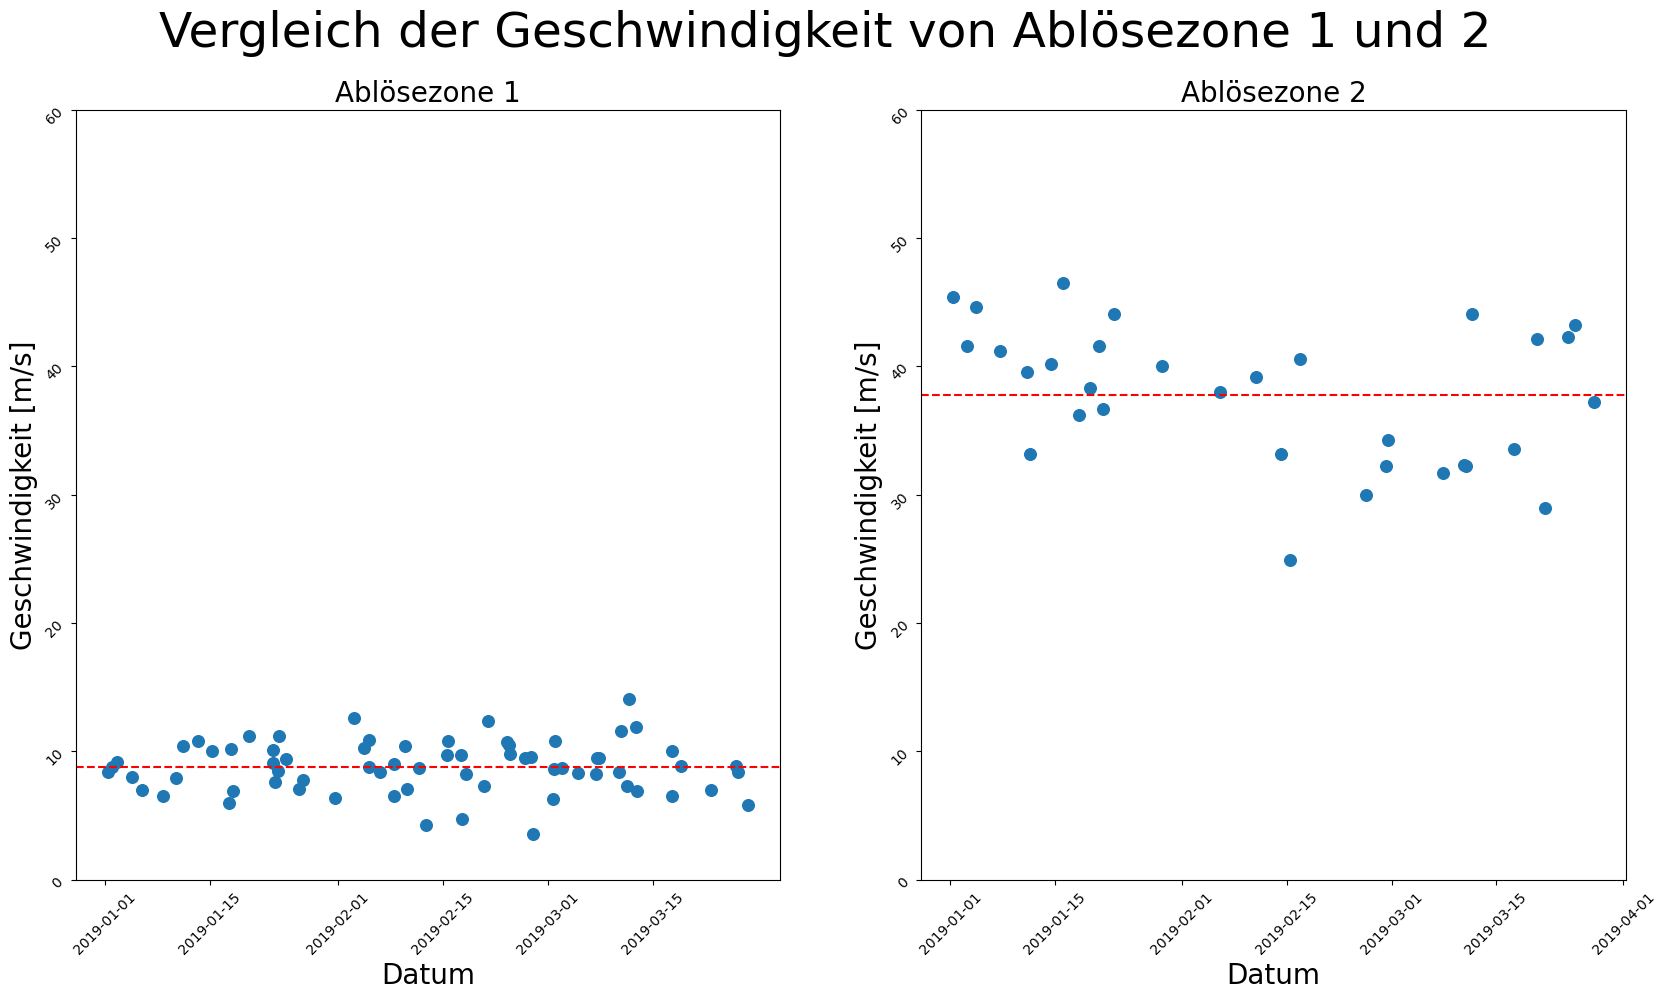

In [87]:
#compare velocity of the fallen rocks
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

#subplot 1
ax1.scatter(df_zone1["date"], df_zone1["vel [m/s]"], s = 70)
ax1.set_xlabel("Datum", fontsize = 20)
ax1.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax1.set_title("Ablösezone 1", fontsize = 20)
ax1.set_ylim(bottom=0, top=60)

#subplot 1
ax2.scatter(df_zone2["date"], df_zone2["vel [m/s]"], s = 70)
ax2.set_xlabel("Datum", fontsize = 20)
ax2.set_ylabel("Geschwindigkeit [m/s]", fontsize = 20)
ax2.set_title("Ablösezone 2", fontsize = 20)
ax2.set_ylim(bottom=0, top=60)

#overall title
plt.suptitle("Vergleich der Geschwindigkeit von Ablösezone 1 und 2", fontsize = 35)

#add meanline
zone1_mean = df_zone1["vel [m/s]"].mean()
ax1.axhline(zone1_mean, color='r', linestyle='--')

zone2_mean = df_zone2["vel [m/s]"].mean()
ax2.axhline(zone2_mean, color='r', linestyle='--')

#change angle of labels
for ax in fig.axes:
    ax.tick_params(labelrotation = 45)

plt.show()

Steine welche sich aus Zone 1 ablösen, weisen eine geringere Geschwindigkeit auf, als jene die sich aus Zone 2 ablösen.

## Zeitliche Verteilung der Steinschläge <a name="dataanalysis-4"></a>

Um einen Überblick über die zeitliche Verteilung von Steinschlägen zu erlangen, werden alle Ereignisse nach Stunden des Tages gruppiert.
Dies ermöglicht eine konkrete statistische Analyse der zeitabhängigen Häufigkeit von Steinschlägen. Basierend auf diesen Daten kann dann untersucht werden, ob es bestimmte Zeitfenster gibt, in denen die Wahrscheinlichkeit für Steinschläge signifikant erhöht ist.

Text(0.5, 0.98, 'Zeitpunkt der Ablösungen')

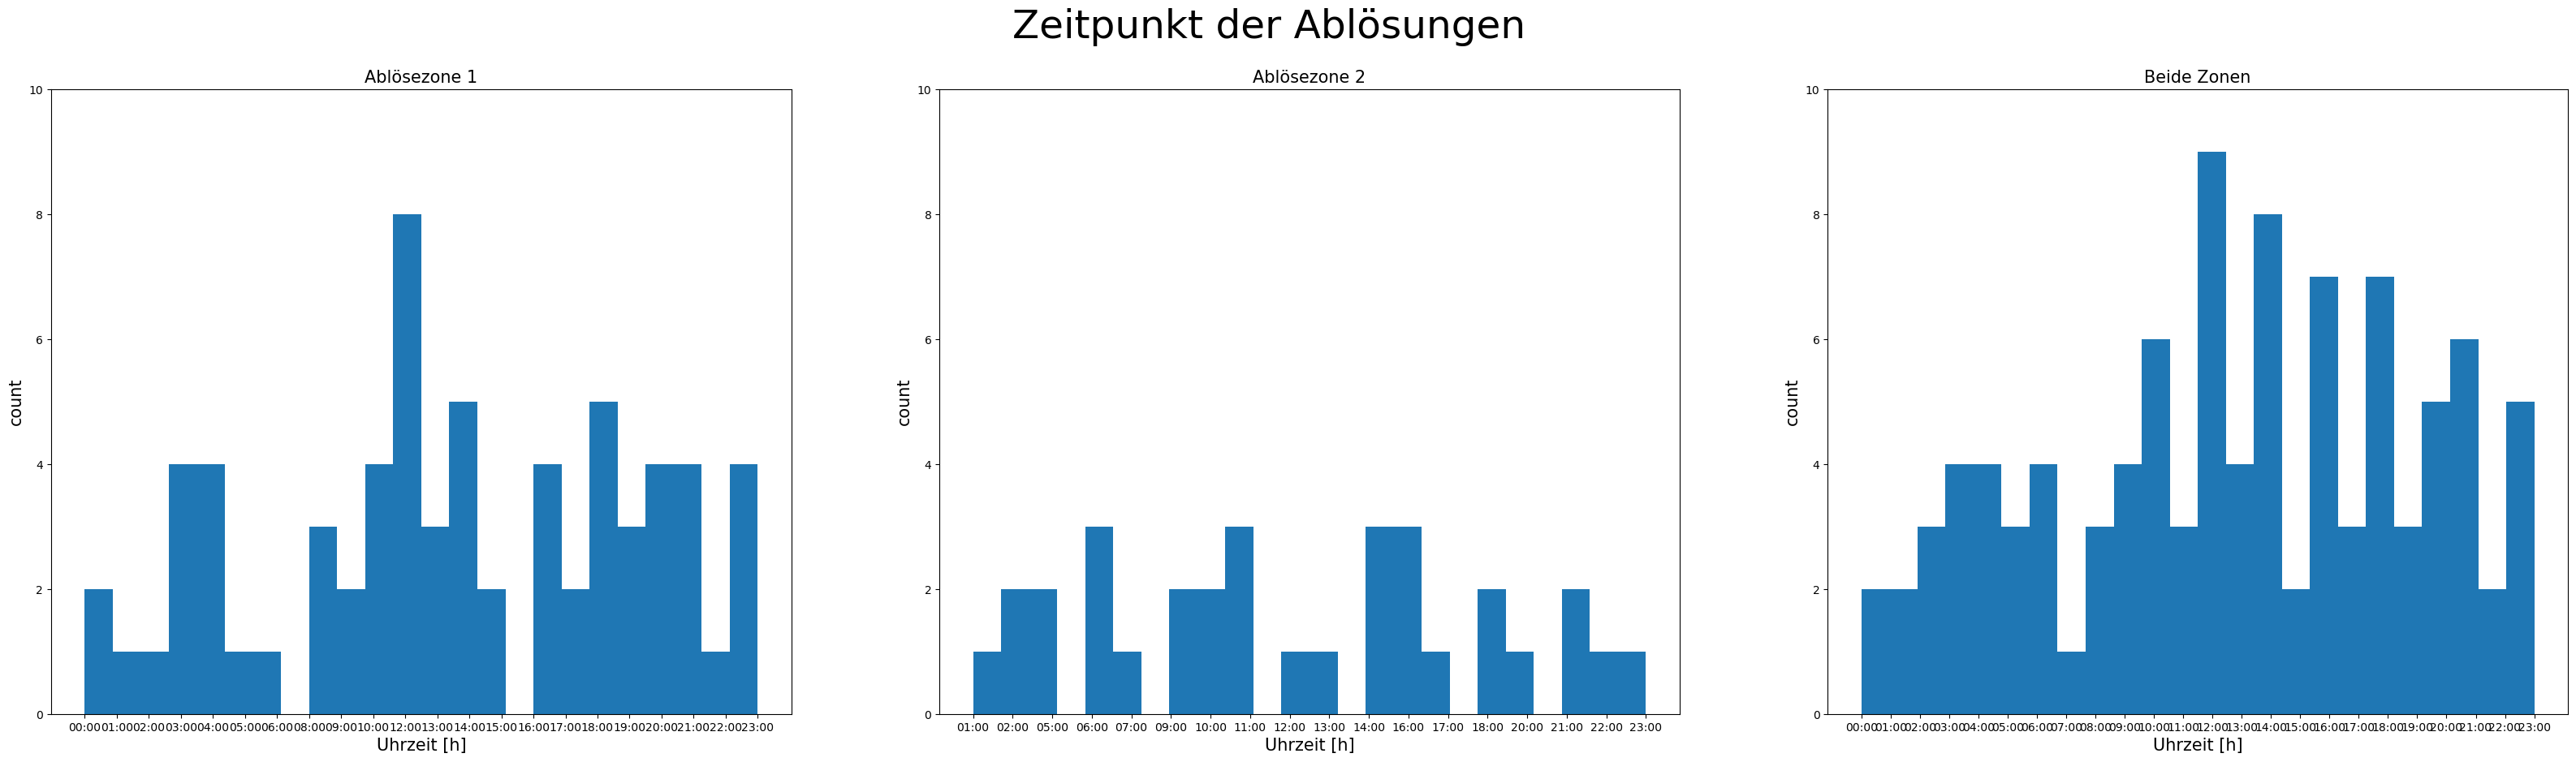

In [88]:
#sort df by time
df_zone1.sort_values(by = "time [h]", inplace = True)
df_zone2.sort_values(by = "time [h]", inplace = True)
df_zoneall.sort_values(by = "time [h]", inplace = True)

#create plot
fig4, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (40, 10))

#subplot 1
ax1.hist(df_zone1["time [h]"], bins=24)
ax1.set_ylabel("count", fontsize = 15)
ax1.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax1.set_title("Ablösezone 1", fontsize = 15)
ax1.set_ylim(bottom=0, top=10)

#subplot 2
ax2.hist(df_zone2["time [h]"], bins=24)
ax2.set_ylabel("count", fontsize = 15)
ax2.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax2.set_title("Ablösezone 2", fontsize = 15)
ax2.set_ylim(bottom=0, top=10)

#subplot 3
ax3.hist(df_zoneall["time [h]"], bins=24)
ax3.set_ylabel("count", fontsize = 15)
ax3.set_xlabel("Uhrzeit [h]", fontsize = 15)
ax3.set_title("Beide Zonen", fontsize = 15)
ax3.set_ylim(bottom=0, top=10)

#overall title
plt.suptitle("Zeitpunkt der Ablösungen", fontsize = 35)


Bei der Kategorisierung der Ereignisse in Relation zur zugehörigen Uhrzeit ist eine signifikante Konzentration von Steinschlagvorfällen um die Mittagszeit zu erkennen, gefolgt von einer nachmittäglichen Abnahme. Der Grossteil der Steine fällt gegen 12 Uhr.

Aufgrund der Tatsache, dass sich sowohl die Vorfälle als auch die Verkehrsdichte im Laufe des Tages wandeln, erscheint es logisch, den Verkehr in unsere Berechnungen miteinzubeziehen.

### Stündliche Verkehrsdichte <a name="dataanalysis-4-1"></a>

Da die Verkehrsdichte in der Region Schiers nicht stündlich erfasst wird, ist eine Berufung auf die Durchschnittsdaten der Schweiz, die vom Bundesamt für Statistik (BFS) erhoben wurden, nötig. Die jüngsten verfügbaren Daten entstammen dem Bericht "Verkehrsverhalten der Bevölkerung" aus dem Jahr 2015.

In [89]:
# import csv

avg_traffic = pd.read_csv("https://raw.githubusercontent.com/ChristianHeeb/cwm1_challenge/main/00_data/ch_traffic_density.csv?token=GHSAT0AAAAAACBZ5JTQ6TWYLM72BY47SUDCZEMOKKQ", sep = ";")

avg_traffic.head(5)

,h,%
0,0,1.507968
1,1,0.712208
2,2,0.456835
3,3,0.421837
4,4,0.980265


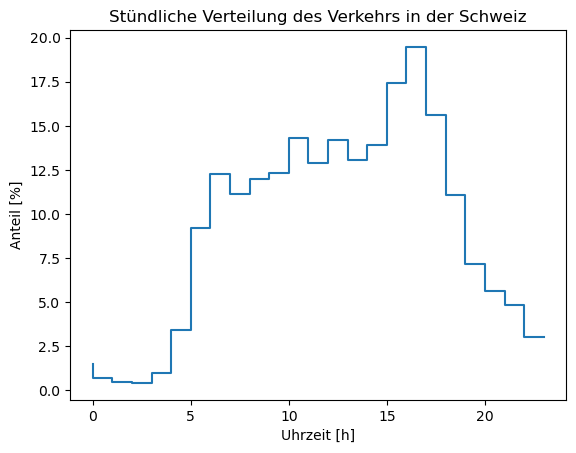

In [90]:
plt.step(avg_traffic["h"],avg_traffic["%"])
plt.title("Stündliche Verteilung des Verkehrs in der Schweiz")
plt.xlabel("Uhrzeit [h]")
plt.ylabel("Anteil [%]")

plt.show()

Die Darstellung des mittleren Verkehrsaufkommens zeigt, dass sich der Verkehr morgens aufbaut und seinen Höhepunkt am Nachmittag erreicht.

# Optimale Verteilungsfunktion finden <a name="datadistribution"></a>

Um die optimale Wahrscheinlichkeitsverteilung für die gegebenen Daten zu ermitteln, erzeugen wir kumulative Verteilungsfunktionen (CDFs) basierend auf einer Reihe verschiedener theoretischer Verteilungen, einschliesslich der Normalverteilung und der Exponentialverteilung. Die Auswahl der korrekten Verteilungsannahme ist von entscheidender Bedeutung, da diese stark in die Simulationen einfliesst und folglich einen erheblichen Einfluss auf das endgültige Ergebnis hat.
Dies führen wir mithilfe des "Fitter" Pakets durch. Das Fitter-Paket verwendet die Scipy-Bibliothek, welche 80 Verteilungsfunktionen unterstützt. Der Fitter scannt alle diese Verteilungen, ruft die Anpassungsfunktion auf, ignoriert diejenigen die fehlschlagen oder ewig laufen, und gibt schliesslich eine Zusammenfassung der besten Verteilungen im Sinne der Summe der quadratischen Fehler.

Die Fitter-Bibliothek verfügt auch über eine Funktion get_common_distribution(), welche 10 gängigsten Verteilungen enthält. Um die Effizienz zu erhöhen und den Zeitaufwand zu minimieren, verwenden wir diese Funktion.

## Beurteilung Ablösezone 1 <a name="dataexamination-1"></a>

### Geschwindigkeit <a name="dataexamination-1-1"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 55.91it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,1.007418,559.582300,-277.984954,inf,0.059355,0.958730
lognorm,1.008072,561.995251,-273.721325,inf,0.060469,0.951994
gamma,1.010142,560.352868,-273.581846,inf,0.063807,0.928074
chi2,1.017533,558.084152,-273.086111,inf,0.075881,0.800376
exponpow,1.047920,542.377735,-271.085098,inf,0.073655,0.827877


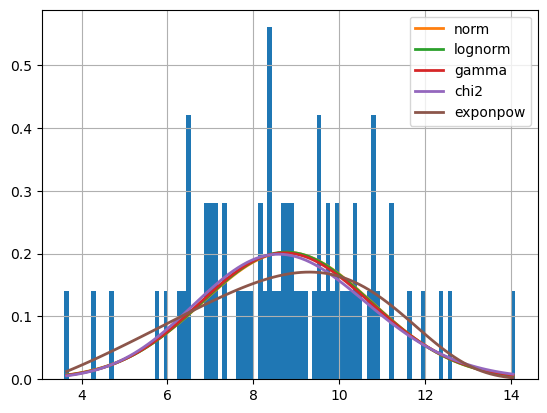

In [91]:
#convert data to NumPy array
df1_vel = df_zone1["vel [m/s]"].values

#fit common distributions to find best
f = Fitter(df1_vel, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()

Im Zusammenhang mit der Geschwindigkeit erweist sich der obere Bereich der Werte als von grösserer Bedeutung. Dies ist darauf zurückzuführen, dass Steine mit höherer Geschwindigkeit eine grössere Aufprallenergie aufweisen, die potenziell dazu beitragen kann, das Netz zu durchbrechen. Unter Berücksichtigung dieser Faktoren wird die Exponpow-Verteilung als die geeignetste Option ausgewählt.

### Masse <a name="dataexamination-1-2"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 53.86it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.000018,1940.238453,-1022.231129,inf,0.180140,0.021090
expon,0.000019,1790.287904,-1019.387389,inf,0.112432,0.331307
gamma,0.000021,1765.999204,-1005.105000,inf,0.117606,0.281183
exponpow,0.000025,1710.846109,-994.899368,inf,0.205474,0.005390
rayleigh,0.000026,1836.215380,-997.271310,inf,0.261453,0.000137


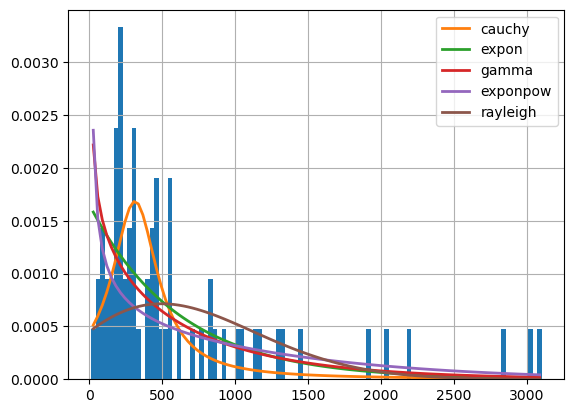

In [92]:
#convert data to NumPy array
df1_mas = df_zone1["mass [kg]"].values

#fit common distributions to find best
f = Fitter(df1_mas, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()

Wie auch bei der Geschwindigkeit, sind hier die höheren Werte von Wichtigkeit, da diese auch ein erhöhtes Potenzial zur Durchbrechung des Sicherheitsnetzes aufweisen. Deshalb eignet sich für diese Daten die Gamma-Verteilung am besten.

### Zeitdifferenz <a name="dataexamination-1-3"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 38.19it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.009305,1083.146894,-592.319718,inf,0.136441,1.447779e-01
expon,0.011535,1060.303179,-581.926045,inf,0.116051,2.956436e-01
powerlaw,0.011755,969.172821,-576.423864,inf,0.211673,3.753727e-03
exponpow,0.013617,991.751233,-566.426218,inf,0.204460,5.712653e-03
lognorm,0.015316,1404.160893,-558.428202,inf,0.398160,3.083183e-10


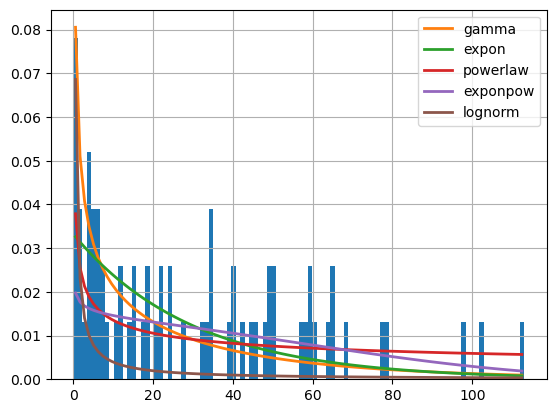

In [93]:
#convert data to NumPy array
df1_date = df_zone1["timediff [h]"].values

#fit common distributions to find best
f = Fitter(df1_date, distributions = get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()

Im Unterschied zu Massen- und Geschwindigkeitsparametern ist im Kontext der Zeitabstände der untere Bereich von besonderem Interesse. Dies ist auf die Tatsache zurückzuführen, dass bei geringeren Zeitabständen zwischen den Steinschlägen mehr Steine auf das Netz treffen können, bevor eine Leerung stattfindet. Deshalb wird hier die Entscheidung für die Expon-Verteilung getroffen.


## Beurteilung der Ablösezone 2 <a name="dataexamination-2"></a>

### Geschwindigkeit <a name="dataexamination-2-1"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 49.22it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
powerlaw,0.597241,639.857044,-117.000238,inf,0.097770,0.890595
norm,0.607154,675.068739,-119.939229,inf,0.104641,0.839121
lognorm,0.607272,676.904694,-116.467247,inf,0.105850,0.829241
chi2,0.608647,677.413072,-116.394853,inf,0.113398,0.763308
gamma,0.608798,677.225194,-116.386964,inf,0.113424,0.763071


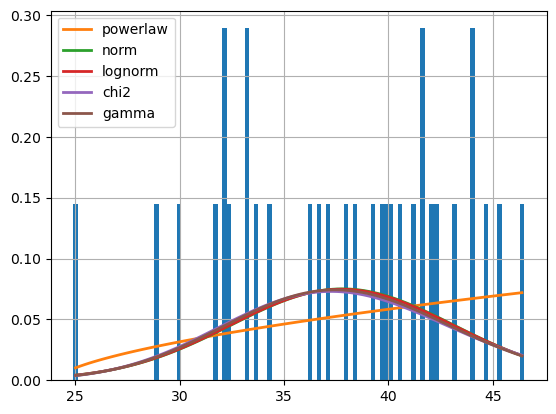

In [94]:
#convert data to NumPy array
df2_vel = df_zone2["vel [m/s]"].values

#fit common distributions to find best
f = Fitter(df2_vel, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


Da die Powerlaw-Verteilung im Bereich der hohen Geschwindigkeiten (> 40 m/s) eine gute Anpassung aufweist, wurde diese ausgewählt.

### Masse <a name="dataexamination-2-2"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 48.24it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.001738,1510.918873,-307.334987,inf,0.190832,0.170510
expon,0.002070,1332.083403,-301.742318,inf,0.157689,0.365264
gamma,0.002088,1332.656086,-298.001909,inf,0.151540,0.413322
exponpow,0.002170,1303.743237,-296.763649,inf,0.196140,0.148793
chi2,0.002280,1378.205371,-295.181272,inf,0.215930,0.086558


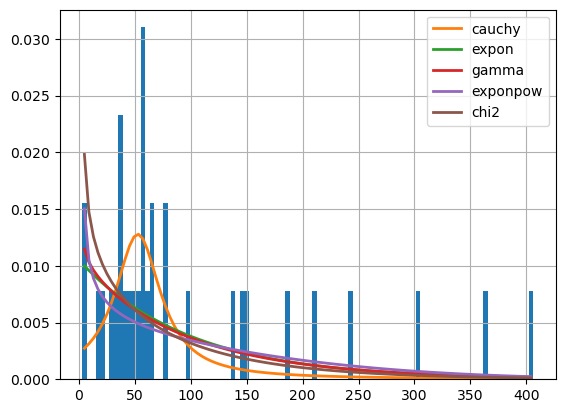

In [95]:
#convert data to NumPy array
df2_mas = df_zone2["mass [kg]"].values

#fit common distributions to find best
f = Fitter(df2_mas, distributions= get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()


Aus den gleichen Gründen wie bei Ablösezone 1, wurde hier die Gamma-Verteilung ausgewählt.

### Zeitdifferenz <a name="dataexamination-2-3"></a>

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 57.02it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.006085,1180.456599,-263.770376,inf,0.067778,0.996290
gamma,0.006085,1165.627059,-263.769783,inf,0.079356,0.978111
expon,0.006240,1166.517434,-266.431264,inf,0.124357,0.659935
exponpow,0.006321,1122.241560,-262.551948,inf,0.188953,0.178767
cauchy,0.006523,1261.312292,-265.008151,inf,0.174832,0.251141


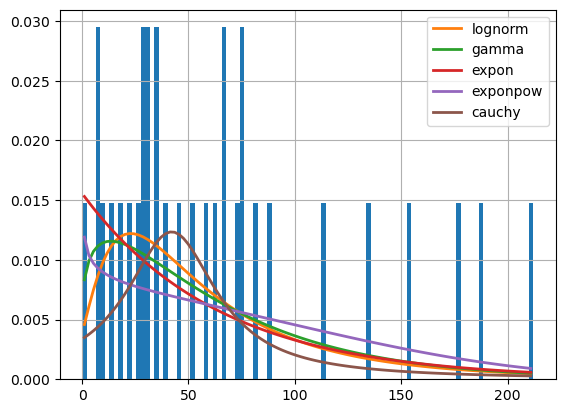

In [96]:
#convert data to NumPy array
df2_date = df_zone2["timediff [h]"].values

#fit common distributions to find best
f = Fitter(df2_date, distributions = get_common_distributions())
f.fit()

#shows the different distributions and fit statistics
f.summary()

Die Expon-Verteilung weist die beste Übereinstimmung auf.

## Übersicht der ausgewählten Verteilungen in Zone 1 und 2 <a name="dataexamination-1-and-2"></a>

| Attribut              | Verteilung |
|:----------------------|:-----------|
| df_zone1 vel [m/s]    | Exponpow   |
| df_zone1 mass [kg]    | Gamma      |
| df_zone1 timediff [h] | Expon      |
| df_zone2 vel [m/s]    | Powerlaw   |
| df_zone2 mass [kg]    | Gamma      |
| df_zone2 timediff [h] | Expon      |


# Simulation der Daten <a name="datasimulation"></a>

Für die Simulation kommt die Monte-Carlo-Methodik zum Einsatz. Hierbei erfolgt die Simulation numerischer Werte auf der Grundlage vorab definierter Verteilungen durch Einsatz der Funktionen von scipy.stats.

Die Zuverlässigkeit einer Monte-Carlo-Simulation ist stark von der Anzahl der Durchläufe abhängig. Ideal für die Analyse wäre eine möglichst hohe Anzahl von Durchläufen. Allerdings steigt mit zunehmender Anzahl der Durchläufe auch der Rechenaufwand. Unter Berücksichtigung dieser Aspekte wurde ein Kompromiss gefunden und die Durchlaufanzahl auf 10 Millionen festgelegt.


In [97]:
#numer of Simulations
number_of_simulations = 10_000_000

np.random.seed(seed = 123)

## Simulation der Zone 1 <a name="datasimulation-1"></a>

Nach der Simulation werden die Daten in den Datensatz df_zone1_sim und df_zone2_sim eingefügt

In [98]:
#create df
df_zone1_sim = pd.DataFrame()

#simulate Velocity
param = stats.exponpow.fit(df_zone1["vel [m/s]"])
zone1_vel = stats.exponpow.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(0, "vel [m/s]", zone1_vel)

#simulate Mass
param = stats.gamma.fit(df_zone1["mass [kg]"])
zone1_mass = stats.gamma.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(1, "mass [kg]", zone1_mass)

#simulate time difference
param = stats.expon.fit(df_zone1["timediff [h]"])
zone1_timediff = stats.expon.rvs(*param, size = number_of_simulations)
#insert values
df_zone1_sim.insert(2, "timediff [h]", zone1_timediff)
#round timediff values
df_zone1_sim["timediff [h]"] = zone1_timediff.round(2)
df_zone1_sim["timediff [h]"][0] = 0

#calculate and insert energy in kj for generated values
df_zone1_sim.insert(3, "KE [kJ]", "")
df_zone1_sim["KE [kJ]"] = 0.5 * df_zone1_sim["mass [kg]"] * df_zone1_sim["vel [m/s]"] ** 2 / 1000


In [99]:
df_zone1_sim.head(5)

,vel [m/s],mass [kg],timediff [h],KE [kJ]
0,10.010356,79.492053,0.00,3.982839
1,7.467871,15.558911,149.34,0.433853
2,7.014349,106.092597,16.77,2.609936
3,9.149896,137.019898,12.27,5.735693
4,10.152313,1245.392926,5.29,64.180993


## Simulation der Zone 2 <a name="datasimulation-2"></a>

In [100]:
#create df
df_zone2_sim = pd.DataFrame()

#simulate Velocity
param = stats.powerlaw.fit(df_zone2["vel [m/s]"])
zone2_vel = stats.powerlaw.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(0, "vel [m/s]", zone2_vel)

#simulate Mass
param = stats.gamma.fit(df_zone2["mass [kg]"])
zone2_mass = stats.gamma.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(1, "mass [kg]", zone2_mass)

#simulate time difference
param = stats.expon.fit(df_zone2["timediff [h]"])
zone2_timediff = stats.expon.rvs(*param, size = number_of_simulations)
#insert values
df_zone2_sim.insert(2, "timediff [h]", zone2_timediff)
#round timediff values
df_zone2_sim["timediff [h]"] = zone2_timediff.round(2)
df_zone2_sim["timediff [h]"][0] = 0

#calculate and insert energy in kj for generated values
df_zone2_sim.insert(3, "KE [kJ]", "")
df_zone2_sim["KE [kJ]"] = 0.5 * df_zone2_sim["mass [kg]"] * df_zone2_sim["vel [m/s]"] ** 2 / 1000


In [101]:
df_zone2_sim.head(5)

,vel [m/s],mass [kg],timediff [h],KE [kJ]
0,33.159434,13.308167,0.00,7.316485
1,44.352796,145.473536,16.95,143.085625
2,27.445084,46.331912,54.23,17.449354
3,32.354893,33.887808,40.72,17.737541
4,40.908545,35.851896,110.27,29.999236


Für weitere Berechnungen wird den kumulierten Zeitabstand berechnet und zu den Datensätzen df_zone1_sim und df_zone2_sim hinzugefügt. Anschliessend werden die Datensätze zusammengefügt.

In [102]:
#calculate and insert cumulative timediff
df_zone1_sim.insert(4, "cum timediff [h]", "")
df_zone1_sim["cum timediff [h]"] = df_zone1_sim["timediff [h]"].cumsum()
df_zone1_sim.head(4)

df_zone2_sim.insert(4, "cum timediff [h]", "")
df_zone2_sim["cum timediff [h]"] = df_zone2_sim["timediff [h]"].cumsum()
df_zone1_sim.head(4)

df_zone1_sim = df_zone1_sim.drop(df_zone1_sim[df_zone1_sim["cum timediff [h]"] > max(df_zone2_sim["cum timediff [h]"])].index)


In [103]:
df_simulations = pd.concat([df_zone1_sim, df_zone2_sim], ignore_index = True)

#sort df_simulations by time
df_simulations.sort_values(by = "cum timediff [h]", inplace = True)

#renew index of combined dfs
df_simulations = df_simulations.reset_index()
df_simulations = df_simulations.drop(['index'], axis=1)

#rearrange columns
df_simulations = df_simulations[["mass [kg]", "vel [m/s]", "KE [kJ]", "timediff [h]", "cum timediff [h]"]]


df_simulations.head(10)


,mass [kg],vel [m/s],KE [kJ],timediff [h],cum timediff [h]
0,79.492053,10.010356,3.982839,0.00,0.00
1,13.308167,33.159434,7.316485,0.00,0.00
2,145.473536,44.352796,143.085625,16.95,16.95
3,46.331912,27.445084,17.449354,54.23,71.18
4,33.887808,32.354893,17.737541,40.72,111.90
5,15.558911,7.467871,0.433853,149.34,149.34
6,106.092597,7.014349,2.609936,16.77,166.11
7,137.019898,9.149896,5.735693,12.27,178.38
8,1245.392926,10.152313,64.180993,5.29,183.67
9,35.851896,40.908545,29.999236,110.27,222.17


In [104]:
df_simulations.describe()

,mass [kg],vel [m/s],KE [kJ],timediff [h],cum timediff [h]
count,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07,2.000000e+07
mean,3.886356e+02,2.333603e+01,5.103490e+01,4.718718e+01,2.358948e+08
std,5.999639e+02,1.522417e+01,6.663674e+01,5.301557e+01,1.681930e+08
min,3.000004e+00,3.137819e+00,6.161984e-02,0.000000e+00,0.000000e+00
25%,5.263663e+01,8.846752e+00,9.602142e+00,1.201000e+01,1.024564e+08
50%,1.473188e+02,2.000106e+01,2.721055e+01,2.982000e+01,2.049513e+08
75%,4.481501e+02,3.868973e+01,6.574010e+01,6.286000e+01,3.212984e+08
max,1.436956e+04,4.650000e+01,1.822853e+03,1.129890e+03,6.427957e+08


In [105]:
#calculate simulated years
simulated_years = max(df_simulations["cum timediff [h]"]) / 8760 #hours in a Year

simulated_years

73378.50949542972

# Bedingung für das Zerreissen des Sicherheitsnetzes <a name="requirements"></a>

Ausgangslage:
Es wurde geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1000 kJ sicher sind. Falls bereits ein Stein mit über 2000 kg in den Sicherheitsnetzen liegt, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 500 kJ. Steine in den Sicherheitsnetzen werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

In [106]:
"""
Function to determine when the net breaks.
Returns true if the net is broken and false if the net is still intact.

Arguments:
mass     – mass of the stone
energy   – force of the stone on impact
cum_mass – accumulated mass in the net

"""
def breakthrough(mass, energy, cum_mass):
    # Safetynet breaks when the impact energy is higher than 1000 kJ
    if energy >= 1000:
        return True

    # Breakthrough when stones with total weight of 200kg are already in the net and the impact energy is more than 500kJ
    elif energy > 500 and cum_mass >= 2000:
        return True

    # no Breakthrough no previous cases applied
    else:
        return False


In [107]:
net_emptying_interval = 24            # interval in hours the maitenance team empties the net
cum_mass_in_net = 0                   # accumulated mass in the net
breakthroughs = 0                     # count of breakthroughs
cum_timediff = 0                      # current timediff from last emptying of the net
net_time_emptying = 24                # next time the net will be emptied
stone_in_net = False                  # will the maitenance team reaction time be started
stones_in_net = 0                     # count of stones in net


for row in df_simulations.itertuples():
    mass = row[1]                   # mass of stone
    energy = row[3]                 # energy of impact by stone
    timediff = row[5]               # accumulation of time differences before this stone hit net

    if(not breakthrough(mass, energy, cum_mass_in_net)):          # Firstly, verify if the new stone will cause a breakthrough
        if (not stone_in_net):                                    # Verify if there is already a stone in the net
            net_time_emptying = timediff + net_emptying_interval  # Set the future emptying time caused by the 24 h reaction of the maitenance team.
            stone_in_net = True                                   # New stone is in net
            stones_in_net = 1                                     # reset stone in net and add the first stone
            cum_mass_in_net = mass                                # set the accumulated mass to the new stone
        else:
            if (net_time_emptying < timediff):                    # If this stone is older than the last planned net emptying
                stones_in_net = 1                                 # reset stone in net and add the first stone
                cum_mass_in_net = mass                            # set the accumulated mass to the new stone
                stone_in_net = True                               # New stone is in net
            else:
                stones_in_net += 1                                # add the stone that is currently held by the net
                cum_mass_in_net += mass                           # add the new stone to the accumulated mass
                stone_in_net = True                               # optional set of reset stone in net true
    else:
        breakthroughs += stones_in_net                            # A breakthrough has happened, the count of rockfalls has been incremented
        cum_mass_in_net = 0                                       # Because of the breakthrough the street will be blocked, reset the accumulated mass.
        stone_in_net = False                                      # After a breakthrough we reset the net and no stones should be held.
        stones_in_net = 0                                         # count of stones in net will be reset

#breakthroughs per year
breakthroughs_per_year = breakthroughs / simulated_years

## Auto wird von Stein getroffen <a name="usecase-1"></a>

Ausgangslage:
Das tägliche Verkehrsaufkommen beträgt 1200 Autos (50/h). Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h.

Bezüglich der durchschnittlichen Anzahl Personen in einem Fahrzeug müssen wir uns auf Schweizer den Schweizer Durchschnitt berufen, welcher durch das BFS erhoben wurden. Diese ist gemäss dem Bericht "Verkehrsverhalten der Bevölkerung" aus dem Jahr 2015, 1.56 Personen pro Fahrzeug.

Gemäß einer Untersuchung, die vom (ADAC) durchgeführt wurde, betrug die durchschnittliche Länge eines Autos im Jahr 2020 etwa 4,60 Meter. Es ist wichtig, diese Tatsache im Kontext potenzieller Risikoszenarien zu berücksichtigen.
Zum Beispiel kann ein Aufprall durch einen Stein, das Fahrzeug beschädigen. Diese Auswirkungen können weitreichend sein, da der Aufprall nicht nur zu direkten Verletzungen oder Tod der Insassen führen kann, sondern auch das Potenzial hat, einen Unfall auszulösen, der wiederum zu tödlichen Verletzungen führen könnte.

Unter der Annahme, dass ein Aufprall an beliebiger Stelle auf dem Fahrzeug dazu führen könnte, dass der Fahrer die Kontrolle verliert, könnte theoretisch jeder Aufprall innerhalb dieser 4,60 Meter zu einem tödlichen Unfall führen. Die genauen Umstände können jedoch variieren und hängen von verschiedenen Faktoren ab, wie zum Beispiel der genauen Position des Aufpralls, der Geschwindigkeit des Fahrzeugs zum Zeitpunkt des Aufpralls und den spezifischen Eigenschaften des Fahrzeugs.


Szenarien:

Erreicht ein Stein die Strasse, können mehrere Szenarien auftreten:
1. Stein liegt auf der Strasse und wird von den Verkehrsteilnehmern bemerkt
2. Stein liegt auf der Strasse und ein Auto fährt in den Stein
3. Stein trifft das Auto

In Szenario 1 erfolgt kein Personenschaden. Dagegen könnte es in Szenario 2 zu möglichen Verletzungen oder Todesfällen kommen. Da dieses Szenario jedoch erhebliche Ungewissheiten birgt und somit nur ungenau berechnet werden kann, liegt der Fokus der Berechnung auf Szenario 3.

Daraus berechnet sich die Gefahr für einen tödlichen Treffer wie folgt:

Die Wahrscheinlichkeit, dass sich ein Fahrzeug in der Gefahrenzone befindet, multipliziert mit der Wahrscheinlichkeit, dass ein Stein das Sicherheitsnetz durchschlägt.



In [108]:
#set Variables
car_length = 4.6
people_in_car = 1.56
car_speed = 60
distance_per_second = car_speed / 3.6
number_of_cars_seconds = 1200 / 24 / 60 / 60

#Probability that a car will be hit directly by a rock
fatal_hit = car_length / distance_per_second * number_of_cars_seconds

#Death probability per year
fatal_hit_per_year = fatal_hit * people_in_car * breakthroughs_per_year

# Fazit <a name="simulation-result"></a>

In diesem Abschnitt werden jegliche Ergebnisse dokumentiert.

## Berechnung der Durchbrüche

In [109]:
print("In unserer Analyse haben wir ",len(df_simulations), " Steine simuliert")
print("In Total simulierten wir {} Jahre.".format(f"{simulated_years:.2f}"))
print("Insgesamt wurden bei der Simulation {} Durchbrüche dokumentiert.".format(breakthroughs))
print("Pro Jahr kommt es zu einem Durchschnitt von {}".format(f"{breakthroughs_per_year:.6f} Durchbrüchen."))


In unserer Analyse haben wir  20000000  Steine simuliert
In Total simulierten wir 73378.51 Jahre.
Insgesamt wurden bei der Simulation 774 Durchbrüche dokumentiert.
Pro Jahr kommt es zu einem Durchschnitt von 0.010548 Durchbrüchen.


## Berechnung des Strassenverkehr

In [110]:
print("Die berechnete Wahrscheinlichkeit, dass ein Stein von einem Auto erfasst wird und es zu einem fatalen Unfall kommt, liegt bei {}".format(f"{fatal_hit:.6f}"))

Die berechnete Wahrscheinlichkeit, dass ein Stein von einem Auto erfasst wird und es zu einem fatalen Unfall kommt, liegt bei 0.003833


## Finale Berechnung

In [111]:
print("Die Todeswahrscheinlichkeit durch Steinschlag auf der Kantonstrasse von Schiers Beträgt: {}".format(f"{fatal_hit_per_year:.10f}"))
if fatal_hit_per_year >= 0.0001:
    print("Somit muss die Strasse gesperrt werden.")
else:
    print("Somit kann die Strasse weiterhin geöffnet bleiben")

Die Todeswahrscheinlichkeit durch Steinschlag auf der Kantonstrasse von Schiers Beträgt: 0.0000630773
Somit kann die Strasse weiterhin geöffnet bleiben


# Quellengrundlage <a name="sources"></a>

Cramer, E., & Kamps, U. (2017). Grundlagen der Wahrscheinlichkeitsrechnung und Statistik: Eine Einführung für Studierende der Informatik, der Ingenieur- und Wirtschaftswissenschaften (4., korrigierte und erweiterte Auflage). Springer Spektrum. https://doi.org/10.1007/978-3-662-54161-6

Fahrmeir, L., Heumann, C., Künstler, R., Pigeot, I., & Tutz, G. (2016). Statistik: Der Weg zur Datenanalyse (8., überarbeitete und ergänzte Auflage). Springer Spektrum. https://doi.org/10.1007/978-3-662-50372-0

Ruiz-Carulla, R., Corominas, J., & Mavrouli, O. (2017). A fractal fragmentation model for rockfalls. Landslides, 14(3), 875–889. https://doi.org/10.1007/s10346-016-0773-8

Raoniar, R. (2022, September 9). Finding the Best Distribution that Fits Your Data using Python’s Fitter Library. The Researchers’ Guide. https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

Biedermann, F. (2017). Verkehrsverhalten der Bevölkerung 2015. Bundesamt für Statistik (BFS).

Christ, J. (2020, Februar 15). Datenanalyse: Autos werden nicht erst seit dem SUV-Boom grösser. https://www.rnd.de/wirtschaft/datenanalyse-autos-werden-nicht-erst-seit-dem-suv-boom-grosser-6GTM66RRNJEC7EYHR3FQS7Y24Y.html
